# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
7344,34397,42091,1242,2014,2014_Gov-G_OK,OK,Gov-G,Gov-G,SoonerPoll.com,308,Live Phone,NaN,10/27/14,949.0,Joe Dorman,8788,DEM,40.0,Mary Fallin,8790,REP,48.4,1.7,-8.4,11/4/14,41.01,55.81,-14.80,6.40,1.0,for KWTV-DT Oklahoma City | KOTV-DT Tulsa
7009,33838,41721,1247,2014,2014_Gov-G_CO,CO,Gov-G,Gov-G,Ipsos,154,Online,NaN,10/17/14,1099.0,John Wright Hickenlooper,8708,DEM,46.0,Bob Beauprez,8704,REP,46.0,NaN,0.0,11/4/14,49.30,45.95,3.34,-3.34,0.5,for Reuters
5228,32654,39250,1538,2010,2010_Sen-G_SC,SC,Sen-G,Sen-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/19/10,500.0,Alvin Greene,1055,DEM,21.0,Jim DeMint,1053,REP,58.0,NaN,-37.0,11/2/10,27.65,61.48,-33.83,-3.17,1.0,NaN
1926,4644,5997,779,2004,2004_Pres-G_MO,MO,Pres-G,Pres-G,SurveyUSA,325,IVR,NaN,10/17/04,670.0,John Kerry,157,DEM,45.0,George W. Bush,182,REP,51.0,NaN,-6.0,11/2/04,46.10,53.30,-7.20,1.20,1.0,NaN
6528,30644,36865,701,2012,2012_Pres-G_WI,WI,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/29/12,1000.0,Barack Obama,16,DEM,49.0,Mitt Romney,9,REP,48.0,NaN,1.0,11/6/12,52.78,45.94,6.84,-5.84,1.0,for Let Freedom Ring


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

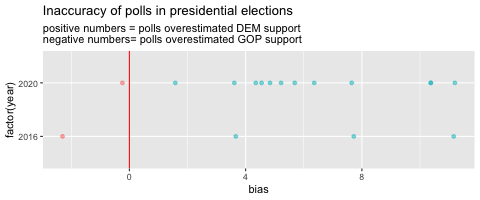

In [18]:
%%R -h 200

df_siena <- df %>% 
    filter(pollster == 'Siena College/The New York Times Upshot') %>%
    filter(type_simple=='Pres-G') 

ggplot(df_siena) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


In [17]:
df.query('pollster == "Siena College/The New York Times Upshot" & type_simple == "Pres-G"').query("location=='US'")

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
9877,71439,133797,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/17/20,987.0,Joseph R. Biden Jr.,13256,DEM,50.0,Donald Trump,13254,REP,41.0,2.0,9.0,11/3/20,51.31,46.86,4.45,4.55,1.0,NaN


,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
6619,63686,117212,688,2012,2012_Pres-G_OH,OH,Pres-G,Pres-G,TCJ Research,327,IVR,NaN,10/31/12,1000.0,Barack Obama,16,DEM,47.6,Mitt Romney,9,REP,49.9,NaN,-2.3,11/6/12,50.67,47.69,2.98,-5.28,0.0,NaN
3698,2435,3019,7404,2008,2008_Pres-D_RI,RI,Pres-P,Pres-D,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,2/23/08,646.0,Hillary Rodham Clinton,45,DEM,53.0,Barack Obama,41,DEM,38.0,NaN,15.0,3/4/08,58.44,40.40,18.04,NaN,1.0,NaN
6675,30611,36942,1479,2012,2012_Sen-G_IN,IN,Sen-G,Sen-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,11/1/12,600.0,Joe Donnelly,2034,DEM,45.0,Richard Mourdock,2035,REP,42.0,NaN,3.0,11/6/12,50.04,44.28,5.76,-2.76,1.0,NaN
2438,4335,5657,764,2004,2004_Pres-G_FL,FL,Pres-G,Pres-G,Gallup,112,Live Phone,NaN,10/30/04,1521.0,John Kerry,157,DEM,48.0,George W. Bush,182,REP,47.0,NaN,1.0,11/2/04,47.09,52.10,-5.01,6.01,0.0,NaN
2829,25062,30300,1610,2006,2006_Sen-G_WA,WA,Sen-G,Sen-G,Zogby Interactive/JZ Analytics,395,Online,NaN,10/25/06,600.0,Maria Cantwell,3063,DEM,50.0,Mike McGavick,3064,REP,46.1,NaN,3.9,11/7/06,56.85,39.93,16.92,-13.02,1.0,for Wall Street Journal; sample size unavailab...
3489,2737,3359,7382,2008,2008_Pres-R_TN,TN,Pres-P,Pres-R,CJ&N,63,Live Phone,NaN,1/29/08,409.0,Mike Huckabee,47,REP,24.0,John McCain,44,REP,23.0,18.0,1.0,2/5/08,34.47,31.80,2.67,NaN,1.0,NaN
6412,51351,81227,4923,2012,2012_House-G_CA-7,CA-7,House-G,House-G,Public Policy Polling,263,IVR,D,10/26/12,792.0,Ami Bera,10648,DEM,46.0,Dan Lungren,10647,REP,46.0,NaN,0.0,11/6/12,51.68,48.32,3.36,-3.36,0.5,for unspecified Democratic sponsor
4008,18178,23132,38,2008,2008_Pres-G_US,US,Pres-G,Pres-G,GfK Group,115,Live Phone,NaN,10/18/08,800.0,Barack Obama,41,DEM,44.0,John McCain,44,REP,43.0,1.0,1.0,11/4/08,52.88,45.61,7.27,-6.27,1.0,for AP
2116,4549,5887,764,2004,2004_Pres-G_FL,FL,Pres-G,Pres-G,SurveyUSA,325,IVR,NaN,10/23/04,749.0,John Kerry,157,DEM,50.0,George W. Bush,182,REP,48.0,NaN,2.0,11/2/04,47.09,52.10,-5.01,7.01,0.0,NaN
8635,48776,76359,611,2016,2016_Pres-G_FL,FL,Pres-G,Pres-G,Gravis Marketing,124,IVR/Online,NaN,11/2/16,1220.0,Hillary Rodham Clinton,9207,DEM,46.0,Donald Trump,9849,REP,45.0,4.0,1.0,11/8/16,47.82,49.02,-1.20,2.20,0.0,for Breitbart News; among registered voters


👉 **Jayhawk Consulting**

In [ ]:
%%R -h 200

df_siena <- df %>% 
    filter(pollster == 'Siena College/The New York Times Upshot') %>%
    filter(type_simple=='Pres-G') 

ggplot(df_siena) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

👉 **Fox News/Beacon Research/Shaw & Co. Research**

👉 **Brown University**

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
